In [152]:
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline 

# Homegrown vs Foreign
### Are homegrown players generally the best in their respective leagues or are they inferior to the foreign players playing in that league? Are these findings portrayed in the FIFA 18’s ratings. 

In [2]:
RQ3_1 = pd.read_csv(('../../data/analysis/RQ3-1.csv'))

In [3]:
Europe_Avg = RQ3_1.loc[RQ3_1['Continent'] == 'Europe', 'Average Form'].mean()
South_America_Avg = RQ3_1.loc[RQ3_1['Continent'] == 'South America', 'Average Form'].mean()
North_America_Avg = RQ3_1.loc[RQ3_1['Continent'] == 'North America', 'Average Form'].mean()
Africa_Avg = RQ3_1.loc[RQ3_1['Continent'] == 'Africa', 'Average Form'].mean()
Australia_Oceania_Avg = RQ3_1.loc[RQ3_1['Continent'] == 'Australia / Oceania', 'Average Form'].mean()

In [4]:
columns = ['Continent','Form']
df = pd.DataFrame(columns=columns)
df = df.fillna(0) # with 0s rather than NaNs

In [5]:
df['Form']=Europe_Avg,South_America_Avg,North_America_Avg,Africa_Avg,Australia_Oceania_Avg

In [6]:
df['Continent'] = ['Europe','South America','North America','Africa','Australia / Oceania']
df= df.set_index('Continent')

In [7]:
df

,Form
Continent,
Europe,2.198340
South America,2.448519
North America,2.163690
Africa,2.131786
Australia / Oceania,1.884363


Text(0.5,1,'Average Form Per Region')

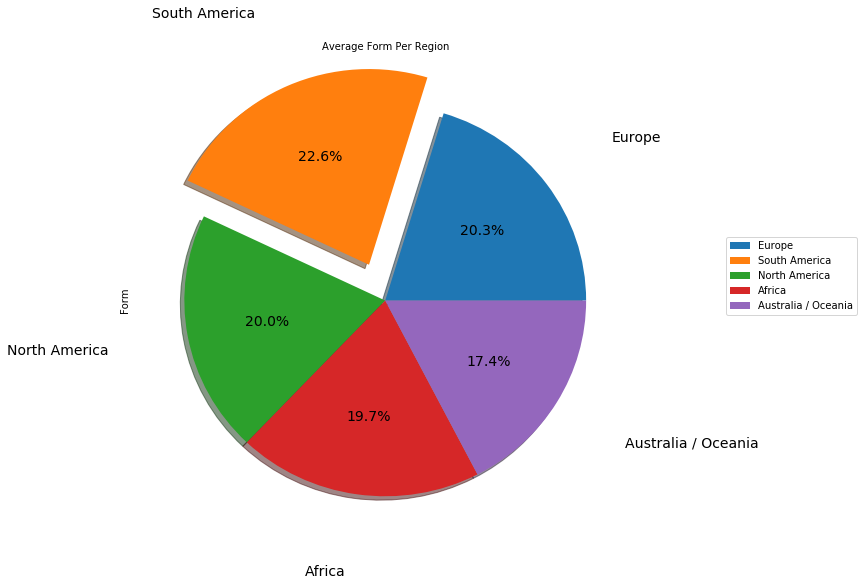

In [8]:
explode = (0,0.2,0,0,0)
labels = ["Europe","South America","North America","Africa","Australia / Oceania"]
df.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,labeldistance=1.4)
plt.legend(loc='right', bbox_to_anchor=(1.45, .55))
plt.title('Average Form Per Region',fontsize=10)

In [15]:
RQ3_2 = pd.read_csv(('../../data/analysis/RQ3-2.csv'))
RQ3_2 = RQ3_2.drop('Unnamed: 0', 1)
RQ3_2 = RQ3_2.iloc[1:]

In [16]:
RQ3_2.head(5)

,Players,club,league,age,nationality,Position,overall,Homegrown,Average Points,Average Form,Average Goals,Average Assists,Average Red,Average Yellow
1,Aaron Cresswell,West Ham United,English Premier League,27.0,England,Defender,76.0,True,119.0,2.766131,1.333333,5.333333,0.0,4.666667
2,Aaron Hughes,Heart of Midlothian,Scottish Premiership,37.0,Northern Ireland,Defender,71.0,False,22.5,1.043269,0.000000,0.000000,0.0,1.500000
3,Aaron Hunt,Hamburger SV,German Bundesliga,30.0,Germany,Midfielder,76.0,True,84.0,2.860984,5.400000,3.200000,0.0,2.400000
4,Aaron Lennon,Everton,English Premier League,30.0,England,Midfielder,77.0,True,72.0,2.499638,2.400000,3.400000,0.0,1.400000
5,Aaron Niguez,Real Oviedo,Spanish Segunda Division,28.0,Spain,Midfielder,73.0,False,32.5,1.511905,0.500000,1.000000,0.0,5.000000


In [98]:
Homegrown_EPL = (RQ3_2.loc[RQ3_2.nationality=='England'])
Homegrown_EPL = Homegrown_EPL.loc[Homegrown_EPL.league=='English Premier League']

Foreign_EPL = (RQ3_2.loc[RQ3_2.nationality!='England'])
Foreign_EPL = Foreign_EPL.loc[Foreign_EPL.league=='English Premier League']

Homegrown_BUN = (RQ3_2.loc[RQ3_2.nationality=='Germany'])
Homegrown_BUN = Homegrown_BUN.loc[Homegrown_BUN.league=='German Bundesliga']

Foreign_BUN = (RQ3_2.loc[RQ3_2.nationality!='Germany'])
Foreign_BUN = Foreign_BUN.loc[Foreign_BUN.league=='German Bundesliga']

Homegrown_LAL = (RQ3_2.loc[RQ3_2.nationality=='Spain'])
Homegrown_LAL = Homegrown_LAL.loc[Homegrown_LAL.league=='Spanish Primera Division']

Foreign_LAL = (RQ3_2.loc[RQ3_2.nationality!='Spain'])
Foreign_LAL = Foreign_LAL.loc[Foreign_LAL.league=='Spanish Primera Division']

Homegrown_LAL = Homegrown_LAL.drop([898])
Dropping Ivan Lopez with -inf form

In [109]:
avg = {'age':'mean','league':'first','overall':'mean','Average Points':'mean','Average Goals':'mean','Average Assists':'mean',
           'Average Yellow':'mean','Average Red':'mean','Average Form':'mean'}
Average = ['league','age','nationality','overall','Average Points',
           'Average Form','Average Goals','Average Assists','Average Red','Average Yellow']

In [110]:
Avg_English = (Homegrown_EPL.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_EPL.columns))
Avg_English = Avg_English[Average]

Avg_Spanish = (Homegrown_LAL.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_LAL.columns))
Avg_Spanish = Avg_Spanish[Average]

Avg_German = (Homegrown_BUN.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_BUN.columns))
Avg_German = Avg_German[Average]


Avg_English_Foreign = (Foreign_EPL.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_EPL.columns))
Avg_English_Foreign = Avg_English_Foreign[Average]

Avg_Spanish_Foreign = (Foreign_LAL.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_LAL.columns))
Avg_Spanish_Foreign = Avg_Spanish_Foreign[Average]

Avg_German_Foreign = (Foreign_BUN.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_BUN.columns))
Avg_German_Foreign =  Avg_German_Foreign[Average]

In [124]:
HomegrownPlayers = [Avg_English,Avg_Spanish,Avg_German]
ForeignPlayers = [Avg_English_Foreign,Avg_Spanish_Foreign,Avg_German_Foreign]

AverageHomegrown = pd.concat(HomegrownPlayers)
AverageForeign = pd.concat(ForeignPlayers)

AverageHomegrown['Homegrown'] = True
AverageForeign['Homegrown'] = False

All_Players = [AverageForeign,AverageHomegrown]
Total_Average = pd.concat(All_Players)

Total_Average['nationality'] = Total_Average.fillna('Foreign')

Total_Average = Total_Average.sort_values(by=['Average Form'],ascending=False)

Total_Average = Total_Average.set_index('league')

In [125]:
Total_Average

,age,nationality,overall,Average Points,Average Form,Average Goals,Average Assists,Average Red,Average Yellow,Homegrown
league,,,,,,,,,,
Spanish Primera Division,26.682927,Spanish Primera Division,79.390244,84.678997,2.662754,4.449458,2.577371,0.102304,5.241057,False
English Premier League,27.388186,English Premier League,78.476793,82.080098,2.612744,3.633544,2.321027,0.098523,3.978833,False
German Bundesliga,26.566176,German Bundesliga,76.977941,70.159559,2.409594,3.213971,2.043137,0.104657,3.708946,False
English Premier League,26.586207,English Premier League,76.146552,72.824569,2.402098,3.012644,2.113937,0.058190,3.438649,True
German Bundesliga,26.000000,German Bundesliga,76.243056,66.155671,2.363074,2.576157,2.090046,0.047917,3.327199,True
Spanish Primera Division,27.047619,Spanish Primera Division,76.682540,65.110979,2.174017,2.241667,1.995767,0.095503,4.918519,True


In [128]:
Total_Average['Performance'] =  Total_Average['Average Points'] / Total_Average.overall

In [129]:
Total_Average

,age,nationality,overall,Average Points,Average Form,Average Goals,Average Assists,Average Red,Average Yellow,Homegrown,Performance
league,,,,,,,,,,,
Spanish Primera Division,26.682927,Spanish Primera Division,79.390244,84.678997,2.662754,4.449458,2.577371,0.102304,5.241057,False,1.066617
English Premier League,27.388186,English Premier League,78.476793,82.080098,2.612744,3.633544,2.321027,0.098523,3.978833,False,1.045916
German Bundesliga,26.566176,German Bundesliga,76.977941,70.159559,2.409594,3.213971,2.043137,0.104657,3.708946,False,0.911424
English Premier League,26.586207,English Premier League,76.146552,72.824569,2.402098,3.012644,2.113937,0.058190,3.438649,True,0.956374
German Bundesliga,26.000000,German Bundesliga,76.243056,66.155671,2.363074,2.576157,2.090046,0.047917,3.327199,True,0.867694
Spanish Primera Division,27.047619,Spanish Primera Division,76.682540,65.110979,2.174017,2.241667,1.995767,0.095503,4.918519,True,0.849098


In [144]:
HEPL = len(Homegrown_EPL)
HBUN = len(Homegrown_BUN)
HLAL = len(Homegrown_LAL)
FEPL = len(Foreign_EPL)
FBUN = len(Foreign_BUN)
FLAL = len(Foreign_LAL)

columns = ['Homegrown','Foreign']
df = pd.DataFrame(columns=columns)
df = df.fillna(0) # with 0s rather than NaNs
df['Homegrown']=HEPL,HBUN,HLAL
df['Foreign']=FEPL,FBUN,FLAL
df = df.transpose()
df.columns = ['EPL', 'BUN','LAL']
df['Total'] = df.sum(axis=1)

In [146]:
df

,EPL,BUN,LAL,Total
Homegrown,116,144,126,386
Foreign,237,136,123,496


Text(0.5,1,'Homegrown vs Foreign')

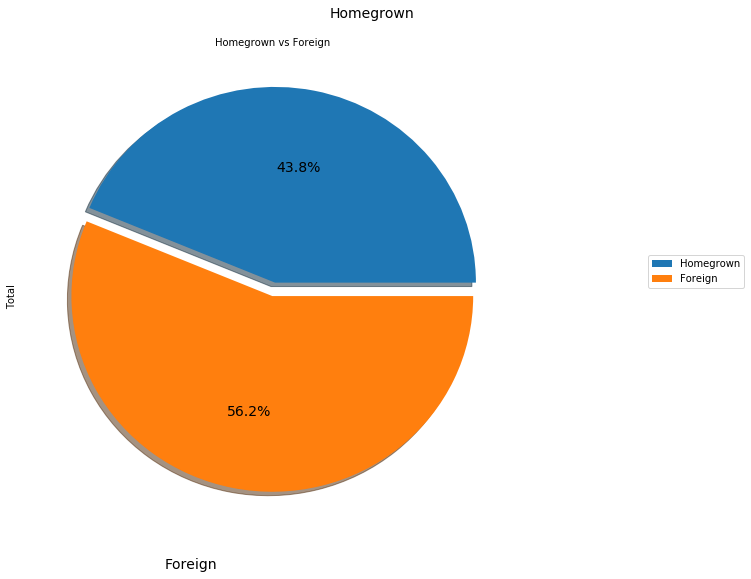

In [149]:
explode = (0.07, 0)
labels = ["Homegrown","Foreign"]
df.plot(subplots=True,kind='pie',y='Total',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,labeldistance=1.4)
plt.legend(loc='right', bbox_to_anchor=(1.45, .55))
plt.title('Homegrown vs Foreign',fontsize=10)

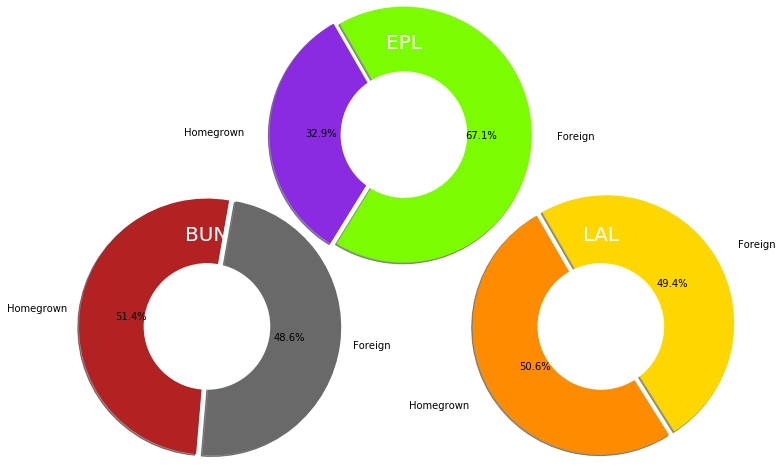

In [497]:
the_grid = GridSpec(3,3)

df.plot(figsize=(10,10))

plt.subplot(the_grid[1, 1], aspect=1)
explode2 = (0.1, 0)
plt.pie(df['EPL'],labels=['Homegrown','Foreign'],labeldistance=1.2,startangle=120,autopct='%.1f%%',shadow=True, radius=2,colors=['blueviolet','lawngreen'],explode=explode2)
plt.gca().set_title('EPL',color='white',fontsize=20)
centre_circle = plt.Circle((0,0),0.99,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(the_grid[2, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(df['BUN'],labels=['Homegrown','Foreign'],labeldistance=1.1,startangle=80,autopct='%.1f%%',shadow=True, radius=2,colors=['firebrick','dimgrey'],explode=explode3)
plt.gca().set_title('BUN',color='white',fontsize=20)
centre_circle = plt.Circle((0,0),0.99,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[2, 2], aspect=1)
explode4 = (0, 0.1)
plt.pie(df['LAL'],labels=['Homegrown','Foreign'],labeldistance=1.2,startangle=120,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['darkorange','gold'])
plt.gca().set_title('LAL',color='white',fontsize=20)
centre_circle = plt.Circle((0,0),0.99,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [404]:
test = Total_Average[['overall','Homegrown']]
test = test.transpose()
test.columns = ['LAL F', 'EPL F','BUN F','EPL H','BUN H','LAL H']
cols = ['LAL H', 'LAL F', 'BUN H', 'BUN F', 'EPL H', 'EPL F']
test = test[cols]
test = test.transpose()

(75, 79.5)

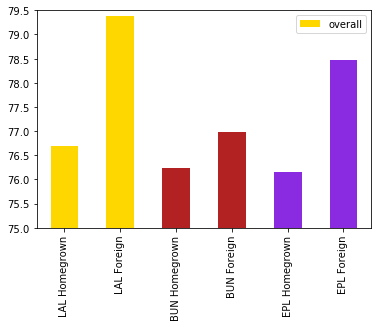

In [406]:
labels = ['LAL Homegrown','LAL Foreign','BUN Homegrown','BUN Foreign','EPL Homegrown','EPL Foreign']
test.plot(x=test.index, y='overall',kind='bar',color=[['gold','gold','firebrick','firebrick','blueviolet','blueviolet']])
axes = plt.gca()
axes.set_xticklabels(labels)
axes.set_ylim([75,79.5])

In [407]:
Homegrown_LAL_GK = Homegrown_LAL.loc[Homegrown_LAL.Position=='Goalkeeper']
Homegrown_LAL_DF = Homegrown_LAL.loc[Homegrown_LAL.Position=='Defender']
Homegrown_LAL_MD = Homegrown_LAL.loc[Homegrown_LAL.Position=='Midfielder']
Homegrown_LAL_FW = Homegrown_LAL.loc[Homegrown_LAL.Position=='Forward']

Homegrown_BUN_GK = Homegrown_BUN.loc[Homegrown_BUN.Position=='Goalkeeper']
Homegrown_BUN_DF = Homegrown_BUN.loc[Homegrown_BUN.Position=='Defender']
Homegrown_BUN_MD = Homegrown_BUN.loc[Homegrown_BUN.Position=='Midfielder']
Homegrown_BUN_FW = Homegrown_BUN.loc[Homegrown_BUN.Position=='Forward']

Homegrown_EPL_GK = Homegrown_EPL.loc[Homegrown_EPL.Position=='Goalkeeper']
Homegrown_EPL_DF = Homegrown_EPL.loc[Homegrown_EPL.Position=='Defender']
Homegrown_EPL_MD = Homegrown_EPL.loc[Homegrown_EPL.Position=='Midfielder']
Homegrown_EPL_FW = Homegrown_EPL.loc[Homegrown_EPL.Position=='Forward']

Foreign_LAL_GK = Foreign_LAL.loc[Foreign_LAL.Position=='Goalkeeper']
Foreign_LAL_DF = Foreign_LAL.loc[Foreign_LAL.Position=='Defender']
Foreign_LAL_MD = Foreign_LAL.loc[Foreign_LAL.Position=='Midfielder']
Foreign_LAL_FW = Foreign_LAL.loc[Foreign_LAL.Position=='Forward']

Foreign_BUN_GK = Foreign_BUN.loc[Foreign_BUN.Position=='Goalkeeper']
Foreign_BUN_DF = Foreign_BUN.loc[Foreign_BUN.Position=='Defender']
Foreign_BUN_MD = Foreign_BUN.loc[Foreign_BUN.Position=='Midfielder']
Foreign_BUN_FW = Foreign_BUN.loc[Foreign_BUN.Position=='Forward']

Foreign_EPL_GK = Foreign_EPL.loc[Foreign_EPL.Position=='Goalkeeper']
Foreign_EPL_DF = Foreign_EPL.loc[Foreign_EPL.Position=='Defender']
Foreign_EPL_MD = Foreign_EPL.loc[Foreign_EPL.Position=='Midfielder']
Foreign_EPL_FW = Foreign_EPL.loc[Foreign_EPL.Position=='Forward']

In [427]:
avg = {'age':'mean','league':'first','overall':'mean','Average Points':'mean','Average Goals':'mean','Average Assists':'mean',
           'Average Yellow':'mean','Average Red':'mean','Average Form':'mean','Position':'first'}

In [428]:
Avg_English_GK = (Homegrown_EPL_GK.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_EPL_GK.columns))
Avg_Spanish_GK = (Homegrown_LAL_GK.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_LAL_GK.columns))
Avg_German_GK = (Homegrown_BUN_GK.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_BUN_GK.columns))

Avg_English_Foreign_GK = (Foreign_EPL_GK.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_EPL_GK.columns))
Avg_Spanish_Foreign_GK = (Foreign_LAL_GK.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_LAL_GK.columns))
Avg_German_Foreign_GK = (Foreign_BUN_GK.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_BUN_GK.columns))

Avg_English_DF = (Homegrown_EPL_DF.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_EPL_DF.columns))
Avg_Spanish_DF = (Homegrown_LAL_DF.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_LAL_DF.columns))
Avg_German_DF = (Homegrown_BUN_DF.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_BUN_DF.columns))

Avg_English_Foreign_DF = (Foreign_EPL_DF.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_EPL_DF.columns))
Avg_Spanish_Foreign_DF = (Foreign_LAL_DF.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_LAL_DF.columns))
Avg_German_Foreign_DF = (Foreign_BUN_DF.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_BUN_DF.columns))

Avg_English_MD = (Homegrown_EPL_MD.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_EPL_MD.columns))
Avg_Spanish_MD = (Homegrown_LAL_MD.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_LAL_MD.columns))
Avg_German_MD = (Homegrown_BUN_MD.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_BUN_MD.columns))

Avg_English_Foreign_MD = (Foreign_EPL_MD.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_EPL_MD.columns))
Avg_Spanish_Foreign_MD = (Foreign_LAL_MD.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_LAL_MD.columns))
Avg_German_Foreign_MD = (Foreign_BUN_MD.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_BUN_MD.columns))

Avg_English_FW = (Homegrown_EPL_FW.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_EPL_FW.columns))
Avg_Spanish_FW = (Homegrown_LAL_FW.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_LAL_FW.columns))
Avg_German_FW = (Homegrown_BUN_FW.groupby(['nationality'], sort=False, as_index=False).agg(avg).reindex(columns=Homegrown_BUN_FW.columns))

Avg_English_Foreign_FW = (Foreign_EPL_FW.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_EPL_FW.columns))
Avg_Spanish_Foreign_FW = (Foreign_LAL_FW.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_LAL_FW.columns))
Avg_German_Foreign_FW = (Foreign_BUN_FW.groupby(['Homegrown'], sort=False, as_index=False).agg(avg).reindex(columns=Foreign_BUN_FW.columns))

In [442]:
HomegrownPlayers_GK = [Avg_English_GK,Avg_Spanish_GK,Avg_German_GK]
ForeignPlayers_GK = [Avg_English_Foreign_GK,Avg_Spanish_Foreign_GK,Avg_German_Foreign_GK]

HomegrownPlayers_DF = [Avg_English_DF,Avg_Spanish_DF,Avg_German_DF]
ForeignPlayers_DF = [Avg_English_Foreign_DF,Avg_Spanish_Foreign_DF,Avg_German_Foreign_DF]

HomegrownPlayers_MD = [Avg_English_MD,Avg_Spanish_MD,Avg_German_MD]
ForeignPlayers_MD = [Avg_English_Foreign_MD,Avg_Spanish_Foreign_MD,Avg_German_Foreign_MD]

HomegrownPlayers_FW = [Avg_English_FW,Avg_Spanish_FW,Avg_German_FW]
ForeignPlayers_FW = [Avg_English_Foreign_FW,Avg_Spanish_Foreign_FW,Avg_German_Foreign_FW]

HomegrownPlayers_GK = pd.concat(HomegrownPlayers_GK)
HomegrownPlayers_DF = pd.concat(HomegrownPlayers_DF)
HomegrownPlayers_MD = pd.concat(HomegrownPlayers_MD)
HomegrownPlayers_FW = pd.concat(HomegrownPlayers_FW)

ForeignPlayers_GK = pd.concat(ForeignPlayers_GK)
ForeignPlayers_DF = pd.concat(ForeignPlayers_DF)
ForeignPlayers_MD = pd.concat(ForeignPlayers_MD)
ForeignPlayers_FW = pd.concat(ForeignPlayers_FW)

HomegrownPlayers_GK = HomegrownPlayers_GK.drop(['Players','club'], 1)
HomegrownPlayers_DF = HomegrownPlayers_DF.drop(['Players','club'], 1)
HomegrownPlayers_MD = HomegrownPlayers_MD.drop(['Players','club'], 1)
HomegrownPlayers_FW = HomegrownPlayers_FW.drop(['Players','club'], 1)

ForeignPlayers_GK = ForeignPlayers_GK.drop(['Players','club'], 1)
ForeignPlayers_DF = ForeignPlayers_DF.drop(['Players','club'], 1)
ForeignPlayers_MD = ForeignPlayers_MD.drop(['Players','club'], 1)
ForeignPlayers_FW = ForeignPlayers_FW.drop(['Players','club'], 1)

In [452]:
HomegrownPlayers_Positions = [HomegrownPlayers_GK,HomegrownPlayers_DF,HomegrownPlayers_MD,HomegrownPlayers_FW]
ForeignPlayers_Positions = [ForeignPlayers_GK,ForeignPlayers_DF,ForeignPlayers_MD,ForeignPlayers_FW]

AverageHomegrown_Positions = pd.concat(HomegrownPlayers_Positions)
AverageForeign_Positions = pd.concat(ForeignPlayers_Positions)
AverageHomegrown_Positions ['Homegrown'] = True
AverageForeign_Positions ['Homegrown'] = False

AverageForeign_Positions = AverageForeign_Positions.fillna('Foreign')

In [460]:
All_Players_Positions = [AverageForeign_Positions,AverageHomegrown_Positions]
Total_Average_Position = pd.concat(All_Players_Positions)
Total_Average_Position = Total_Average_Position.sort_values(['Position', 'league'], ascending=True)

In [461]:
Total_Average_Position = Total_Average_Position.set_index('league')
Total_Average_Position

,age,nationality,Position,overall,Homegrown,Average Points,Average Form,Average Goals,Average Assists,Average Red,Average Yellow
league,,,,,,,,,,,
English Premier League,27.632911,Foreign,Defender,77.518987,False,72.356118,2.435898,1.078481,1.205696,0.132489,4.718987
English Premier League,26.450000,England,Defender,76.075000,True,69.096250,2.268765,0.996250,1.578750,0.060000,3.976250
German Bundesliga,26.021739,Foreign,Defender,76.434783,False,59.370290,2.165008,1.100000,0.913406,0.136232,4.213406
German Bundesliga,26.189189,Germany,Defender,75.972973,True,62.051351,2.225400,1.015766,1.675676,0.054955,3.863964
Spanish Primera Division,26.615385,Foreign,Defender,78.435897,False,71.846581,2.405929,1.100855,1.080769,0.139744,6.376068
Spanish Primera Division,27.594595,Spain,Defender,76.270270,True,56.193694,2.123051,0.905856,1.404505,0.143243,6.237838
English Premier League,26.545455,Foreign,Forward,78.090909,False,108.121970,3.224564,9.514773,3.179167,0.096591,3.315530
English Premier League,26.416667,England,Forward,75.750000,True,86.597917,3.083875,7.616667,2.564583,0.051389,2.713194
German Bundesliga,26.354839,Foreign,Forward,76.322581,False,84.522043,2.734975,6.811828,2.554301,0.105914,3.181183
